<a href="https://colab.research.google.com/github/ThomazLonghi/aula_analise_precos/blob/main/melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do preço de casas em Melbourne**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline


In [ ]:
base = pd.read_csv('/content/drive/MyDrive/projeto/projetos_basicos/base_dados/melb_data.csv')
base.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


## **Tratando a base para o modelo**

In [ ]:
#retirando colunas com alta cardinalidade
base1 = base.drop(["Suburb","Address","SellerG","Date"],axis=1)


In [ ]:
#retirando colunas com mais de 20% de valores nulos
base1 = base.drop(["BuildingArea","YearBuilt",],axis=1)

In [ ]:
base1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [ ]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  CouncilArea    12211 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

In [ ]:
#objetivo dessa função é transformar as colunas de texto em colunas numéricas
def tratar_valores_string(DataFrame):

  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for coluna in DataFrame.columns:
    if DataFrame[coluna].dtype == 'object':
      DataFrame[coluna] = le.fit_transform(DataFrame[coluna])


In [ ]:
#fiz uma copia apenas para poder visualizar a correlação
base_copia = base1.copy()
tratar_valores_string(base_copia)
base_copia.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12794,2,0,1480000.00,1,23,45,2.50,3067.00,2.00,1.00,1.00,202.00,31,-37.80,145.00,2,4019.00
1,0,5943,2,0,1035000.00,1,23,47,2.50,3067.00,2.00,1.00,0.00,156.00,31,-37.81,144.99,2,4019.00
2,0,9814,3,0,1465000.00,3,23,48,2.50,3067.00,3.00,2.00,0.00,134.00,31,-37.81,144.99,2,4019.00
3,0,9004,3,0,850000.00,0,23,48,2.50,3067.00,3.00,2.00,1.00,94.00,31,-37.80,145.00,2,4019.00
4,0,10589,4,0,1600000.00,4,155,49,2.50,3067.00,3.00,1.00,2.00,120.00,31,-37.81,144.99,2,4019.00


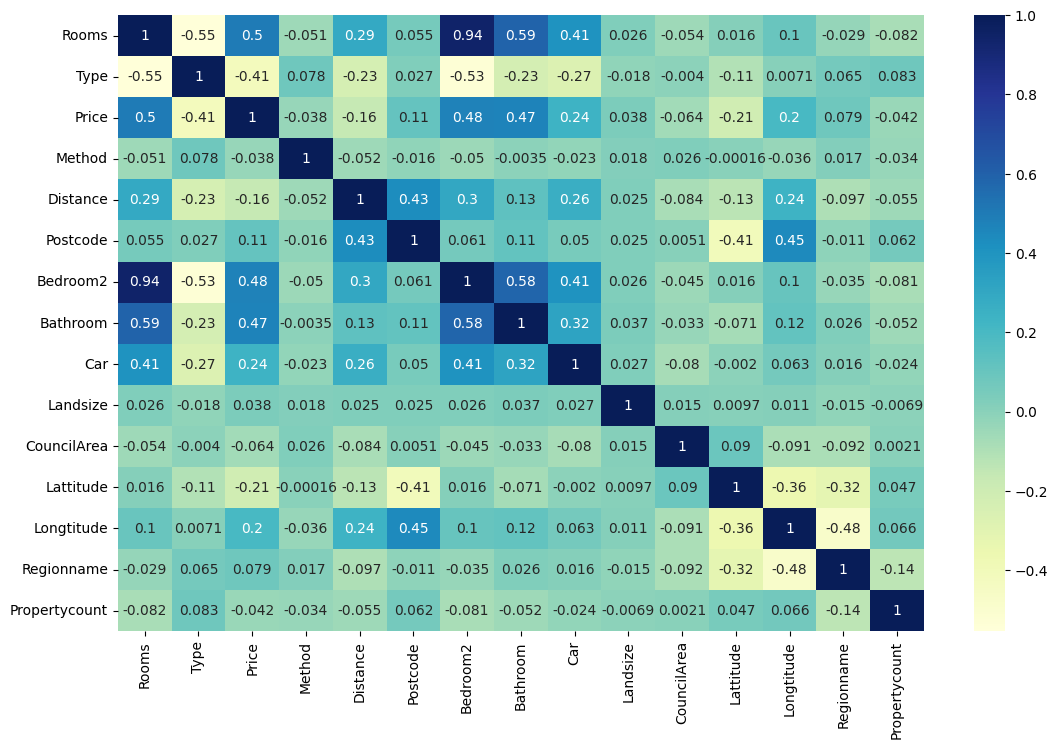

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(base_copia.corr(),annot=True,cmap='YlGnBu')
plt.show()
#para visualizar o cmap é preciso transformar as variáveis de texto em numéricas

In [ ]:
#escolhendo as variáveis que tem a correlação mais alta e Landsize porque retiramos a BuildingArea
base2 = base1[['Price','Rooms','Bedroom2','Bathroom','Car','Landsize']]

## **Verificando Base tratada**

In [ ]:
base2.info()
#na coluna Car existem valores vazios que devem ser retirados para que os algoritmos funcionem(a maioria)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bedroom2  13580 non-null  float64
 3   Bathroom  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [ ]:
#dropa (retira) todos os dados faltantes (NaN)
base2.dropna(axis=0)

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize
0,1480000.00,2,2.00,1.00,1.00,202.00
1,1035000.00,2,2.00,1.00,0.00,156.00
2,1465000.00,3,3.00,2.00,0.00,134.00
3,850000.00,3,3.00,2.00,1.00,94.00
4,1600000.00,4,3.00,1.00,2.00,120.00
...,...,...,...,...,...,...
13575,1245000.00,4,4.00,2.00,2.00,652.00
13576,1031000.00,3,3.00,2.00,2.00,333.00
13577,1170000.00,3,3.00,2.00,4.00,436.00
13578,2500000.00,4,4.00,1.00,5.00,866.00


In [ ]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bedroom2  13580 non-null  float64
 3   Bathroom  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [ ]:
base2.head()

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize
0,1480000.00,2,2.00,1.00,1.00,202.00
1,1035000.00,2,2.00,1.00,0.00,156.00
2,1465000.00,3,3.00,2.00,0.00,134.00
3,850000.00,3,3.00,2.00,1.00,94.00
4,1600000.00,4,3.00,1.00,2.00,120.00


## **Criação do Algoritmo**

In [ ]:
#Separando a variavel Alvo da base de dados
X = base2.drop('Price',axis=1)
#Alvo
y = base2.Price

In [ ]:
#Separando base de treino e teste
# - a base de treino vai usada para treinar o modelo a fazer previsões
# - a base de teste vai ser usada para comparar com as previsões feitas pelo treino,
# verificando o erro das previsões feitas pelo modelo
from sklearn.model_selection import train_test_split
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=15)

##**Regressão Linear**

In [ ]:
#importando modelo
from sklearn.linear_model import LinearRegression

In [ ]:
#instanciar
modelo = LinearRegression()

In [ ]:
#treinando o modelo (fit)
modelo.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
#usando modelo para prever os dados de teste
previsores_modelo = modelo.predict(X_teste)

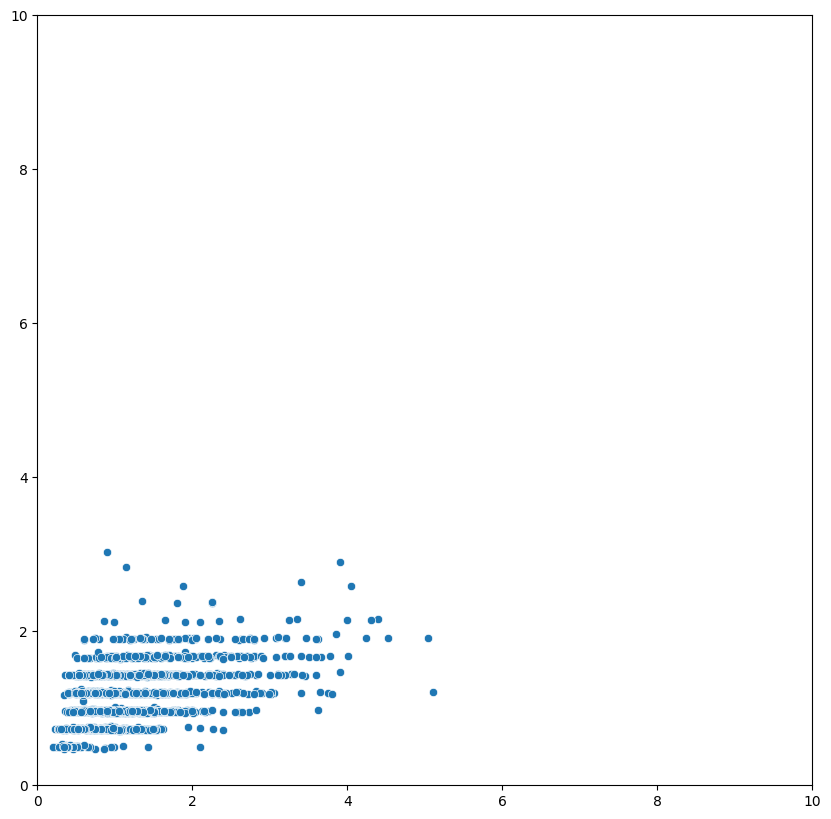

In [ ]:
#visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=previsores_modelo/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [ ]:
#Avaliando o erro quadratido medio (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste,previsores_modelo)
mse

270314654764.93677

In [ ]:
# Avaliando o R quadrado (R²)
# R²-> é uma métrica que indica o quanto a linha de regressão se ajusta aos dados
# Obervação: os valores de correlação que estão próximos de 1 positivo ou 1 negativo são bons
from sklearn.metrics import r2_score
r2 = r2_score(y_teste,previsores_modelo)
r2

0.3096026597333058

##**Criando outro modelo de Regressão Linear para comparar**

In [ ]:
# Nesse modelo será usado todas as colunas
base3 = base1[['Price','Rooms','Bedroom2','Bathroom','Car','Longtitude','Distance','Lattitude','Landsize','Postcode','Propertycount']]

In [ ]:
base3 = base3.dropna(axis=0)
base3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bedroom2       13518 non-null  float64
 3   Bathroom       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Distance       13518 non-null  float64
 7   Lattitude      13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


In [ ]:
#Separando a variavel Alvo da base de dados
X = base3.drop('Price',axis=1)
#Alvo
y = base3.Price

from sklearn.model_selection import train_test_split
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=15)

#importando modelo
from sklearn.linear_model import LinearRegression

#instanciar
modelo2 = LinearRegression()

#treinando o modelo (fit)
modelo2.fit(X_treino, y_treino)

#usando modelo para prever os dados de teste
previsores_modelo2 = modelo2.predict(X_teste)


#Avaliando o erro quadratido medio (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste,previsores_modelo2)
print(mse)

# Avaliando o R quadrado (R²)
from sklearn.metrics import r2_score
r2 = r2_score(y_teste,previsores_modelo2)
print(r2)

197410460205.1668
0.4958036707814112


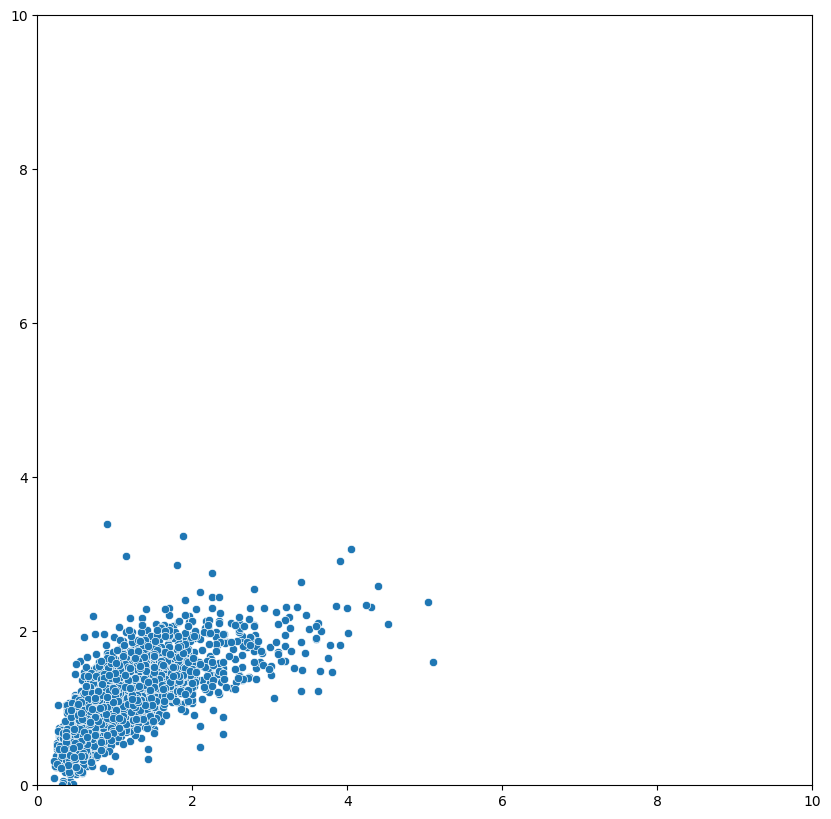

In [ ]:
#visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=previsores_modelo2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()


#**Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo_arvore = DecisionTreeRegressor()

In [ ]:
modelo_arvore.fit(X_treino,y_treino)

DecisionTreeRegressor()

In [ ]:
previsores_arvore = modelo_arvore.predict(X_teste)

In [ ]:
erro_arvore = mean_squared_error(y_teste,previsores_arvore)
erro_arvore

170970406290.5963

In [ ]:
r_arvore = r2_score(y_teste,previsores_arvore)
r_arvore

0.5633329096789512